<a href="https://colab.research.google.com/github/mspatke/Deep-Learning-with-Pytorch/blob/main/5_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notes:
When you call loss.backward(), all it does is compute gradient of loss w.r.t all the parameters in loss that have requires_grad = True and store them in parameter.grad attribute for every parameter.

optimizer.step() updates all the parameters based on parameter.grad

In [47]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [48]:
X_numpy , y_numpy  = datasets.make_regression(n_samples=100, n_features=1, noise =20, random_state=1)

In [49]:
X_numpy.shape, y_numpy.shape

((100, 1), (100,))

In [50]:
y_numpy.shape

(100,)

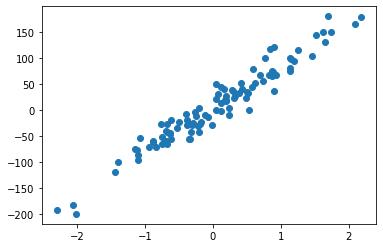

In [51]:
plt.plot(X_numpy,y_numpy,'o')

In [52]:
x = torch.from_numpy(X_numpy.astype(np.float32))

In [53]:
x.shape

torch.Size([100, 1])

In [54]:
y = torch.from_numpy(y_numpy.astype(np.float32))

In [55]:
y=y.view(y.shape[0],1)

In [56]:
y.shape

torch.Size([100, 1])

In [57]:
n_samples, n_features = x.shape

In [58]:
n_samples, n_features

(100, 1)

In [59]:
# 1) set up the model

input_size = n_features
output_size = 1

liner_model = nn.Linear(input_size, output_size)

In [60]:
# 2) loss and optimizer
learning_rate =0.001

criterion = nn.MSELoss()  # callable funtion

optimizer = torch.optim.SGD(liner_model.parameters(), lr = learning_rate )

In [ ]:
# 3)training loop : 
#     forward pass - compute prediction and loss
#     backward pass - gradients
#     update the weights

num_epoch = 1000

for epoch in range(num_epoch):

  #forward pass and loss
  y_predicted = liner_model(x)
  loss = criterion(y_predicted, y)

  #backward pass
  loss.backward()

  #update
  optimizer.step()
  
  #
  optimizer.zero_grad()

  if(epoch+1) % 10 ==0:
    print(f'epoch :{epoch+1}, loss ={loss.item():.4f}')



<Figure size 720x720 with 0 Axes>

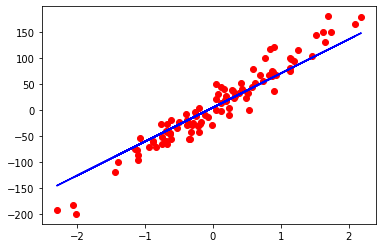

<Figure size 720x720 with 0 Axes>

In [65]:
#plot
predicted = liner_model(x).detach()
plt.plot(X_numpy, y_numpy ,'ro')
plt.plot(X_numpy, predicted,'b')
plt.figure(figsize=(10,10))